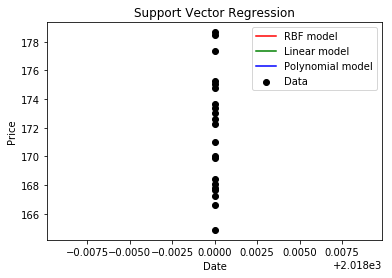

In [3]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


#plt.switch_backend('GTK')  



dates = []
prices = []

def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	# skipping column names
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return

def predict_price(dates, prices, x):
	dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

	svr_lin = SVR(kernel= 'linear', C= 1e3)
	svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
	svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
	svr_rbf.fit(dates, prices) # fitting the data points in the models
	svr_lin.fit(dates, prices)
	svr_poly.fit(dates, prices)

	plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
	plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
	plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
	plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()

	return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

get_data('aapl.csv') # calling get_data method by passing the csv file to it
#print "Dates- ", dates
#print "Prices- ", prices

predicted_price = predict_price(dates, prices, 29)  